# Data Pre Processing



In [ ]:
import librosa                    
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_location = '/content/drive/My Drive/sem5MlProject/dataset/audio/fold1/101415-3-0-2.wav'
y, sr = librosa.load(file_location)

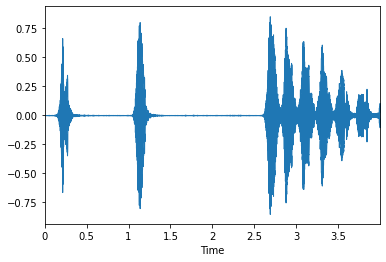

In [ ]:
librosa.display.waveplot(y=y, sr= sr)

In [ ]:
y.shape

(88200,)

In [ ]:
melSpec = librosa.feature.melspectrogram(y=y[:65500], sr=sr, n_mels=128)

melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)
melSpec_dB.shape

(128, 128)

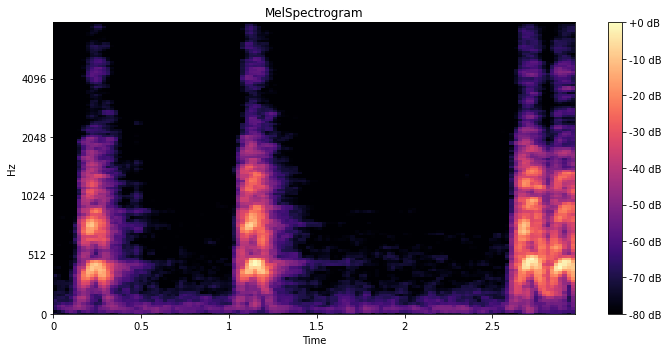

In [ ]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(melSpec_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MelSpectrogram")
plt.tight_layout()
plt.show()

In [ ]:
def get_mfcc(path):
    y, sr = librosa.load(path, sr=22050, duration=3)
    if y.shape[0] < 65500:
        y = np.append(y, np.full( (65500-y.shape[0]), np.mean(y)))
    
    melSpec = librosa.feature.melspectrogram(y=y[:65500], sr=sr, n_mels=128)
    melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)
    return melSpec_dB

In [ ]:
def get_cat(file_name):
    for i in range(len(file_name)):
        if(file_name[i] == '-'):
            return int(file_name[i+1])

In [ ]:
import os
base_dir = '/content/drive/My Drive/sem5MlProject/dataset/audio/'
for fold in os.listdir(base_dir):
    data = []
    for audio_file in os.listdir(base_dir+fold):
        data.append([get_mfcc(base_dir+fold+'/'+audio_file), get_cat(audio_file)])

    np.save('/content/drive/MyDrive/sem5MlProject/dataset/PreProcessedData/'+fold+'.npy', data)
    print(fold+' done')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


fold2 done
fold4 done
fold1 done
fold6 done
fold3 done
fold5 done
fold10 done
fold8 done
fold7 done


In [ ]:
data = []
for audio_file in os.listdir(base_dir+'fold8'):
    data.append([get_mfcc(base_dir+'fold8'+'/'+audio_file), get_cat(audio_file)])

np.save('/content/drive/MyDrive/sem5MlProject/dataset/PreProcessedData/fold8'+'.npy', data)
print('fold8'+' done')

data = []
for audio_file in os.listdir(base_dir+'fold9'):
    data.append([get_mfcc(base_dir+'fold9'+'/'+audio_file), get_cat(audio_file)])

np.save('/content/drive/MyDrive/sem5MlProject/dataset/PreProcessedData/fold9'+'.npy', data)
print('fold9'+' done')

fold8 done
fold9 done
